In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import stats
from scipy.stats import linregress
import numpy as np

In [6]:
file = 'Resources/countries.csv'

In [7]:
Global_footprint_df = pd.read_csv(file)
Global_footprint_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [ ]:
#removing empty data from the dataset
clean_dataset = Global_footprint_df.dropna()

#defining variables
x = clean_dataset['HDI'].values.tolist()
y = clean_dataset['Earths Required'].values.tolist()
s = clean_dataset['Population (millions)'].values.tolist()

#define colors 
def color_attribute(region):
    colors = {
        "Africa": "red",
        "Asia-Pacific":"aqua",
        "European Union":"blue",
        "Latin America":'coral',
        "Middle East/Central Asia":'yellow',
        "North America": "lime",
        "Northern/Eastern Europe": "mediumseagreen"}
    return colors.get(region, 'black')

color_region = []
countries = len(clean_dataset['Region'])
for country in range(countries):
    color_region.append(color_attribute((clean_dataset['Region'].tolist())[country]))

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

#Scatter plot
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(x, y, s, c = color_region, alpha = 1, edgecolor = 'k')
plt.plot(x, fit, 'black', label='fitted line')
plt.legend()
plt.grid()
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Earths Required (gha)')
plt.text(0.315, 8.5, "R-squared = 0.54",bbox=dict(facecolor='white', alpha=1))

#save figure
plt.savefig('Images/HDI vs EarthsReqd_population_region')

In [18]:
Global_footprint_df['HDI'].max()
Global_footprint_df['HDI'].min()

0.34

In [8]:
bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Create the names for the four bins
group_names = ["<0.4", "0.41-0.5", "0.51-0.6", "0.61-0.7", "0.71-0.8", "0.81-0.9", ">0.9"]

Global_footprint_df["HDI_groups"] = pd.cut(Global_footprint_df["HDI"], bins, labels=group_names)

Global_footprint_df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,HDI_groups
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6,0.41-0.5
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6,0.71-0.8
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5,0.71-0.8
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6,0.51-0.6
4,Antigua and Barbuda,Latin America,0.090,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.700000,2,0.71-0.8
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6,0.81-0.9
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B,0.71-0.8
7,Aruba,Latin America,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.690000,2,NaN
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5,>0.9
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5,0.81-0.9


In [9]:
grouped_byHDI= Global_footprint_df.groupby("HDI_groups")
HDI_Earth_Reqd= Global_footprint_df.groupby("HDI_groups").mean()['Earths Required']
HDI_Earth_Reqd = pd.DataFrame(HDI_Earth_Reqd)
print(HDI_Earth_Reqd)

#calculating standard error
HDI_earth_sem = Global_footprint_df.groupby("HDI_groups").sem()['Earths Required']
HDI_earth_sem = pd.DataFrame(HDI_earth_sem)

            Earths Required
HDI_groups                 
<0.4               0.652857
0.41-0.5           0.729231
0.51-0.6           0.876316
0.61-0.7           1.341200
0.71-0.8           1.943462
0.81-0.9           3.377187
>0.9               3.763636


In [11]:
Global_footprint_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,HDI_groups
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6,0.41-0.5
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6,0.71-0.8
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5,0.71-0.8
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6,0.51-0.6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2,0.71-0.8


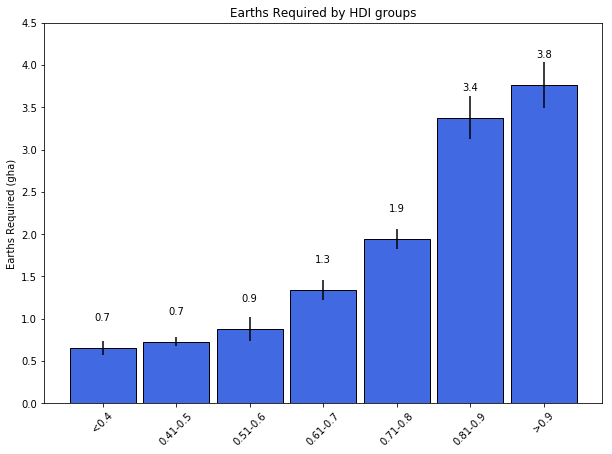

In [21]:
HDI_groups = HDI_Earth_Reqd.index.tolist()
Earths_reqd = HDI_Earth_Reqd['Earths Required'].tolist()
SEM = HDI_earth_sem['Earths Required'].tolist()

fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(HDI_groups))
ax.set_xticks(x_axis)
ax.set_xticklabels(HDI_groups, rotation = 45)
plt.ylim(0, 4.5)


rects1 = ax.bar(x_axis, Earths_reqd, width = 0.9, color = 'royalblue', yerr = SEM, edgecolor = 'k')

plt.ylabel('Earths Required (gha)')
plt.title ('Earths Required by HDI groups')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.3, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects1)

plt.savefig('Images/HDI vs Earths Required')

In [22]:
HDI_Footprint= Global_footprint_df.groupby("HDI_groups").mean()['Total Ecological Footprint']
HDI_Footprint = pd.DataFrame(HDI_Footprint)
HDI_Footprint

,Total Ecological Footprint
HDI_groups,
<0.4,1.132857
0.41-0.5,1.263077
0.51-0.6,1.516842
0.61-0.7,2.323600
0.71-0.8,3.366346
0.81-0.9,5.845000
>0.9,6.518182


In [23]:
HDI_biocapacity= Global_footprint_df.groupby("HDI_groups").mean()['Total Biocapacity']
HDI_biocapacity = pd.DataFrame(HDI_biocapacity)
HDI_biocapacity

,Total Biocapacity
HDI_groups,
<0.4,2.140000
0.41-0.5,1.498462
0.51-0.6,2.146316
0.61-0.7,6.044400
0.71-0.8,4.068846
0.81-0.9,3.098125
>0.9,6.178182


In [24]:
HDI_Deficit= Global_footprint_df.groupby("HDI_groups").mean()['Biocapacity Deficit or Reserve']
HDI_Deficit = pd.DataFrame(HDI_Deficit)

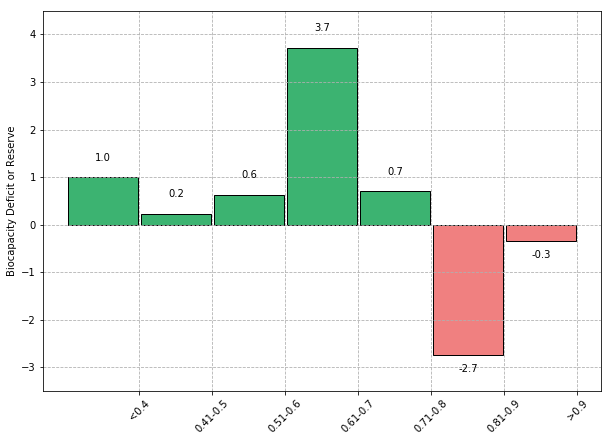

In [25]:
#Data 
HDI_grouping = HDI_Deficit.index.tolist()
Deficit_reserve = HDI_Deficit['Biocapacity Deficit or Reserve'].tolist()

#axes setup and formatting
fig, ax = plt.subplots(figsize = (10,7))
x_axis = np.arange(len(HDI_grouping))
ax.set_xticks (x_axis)
ax.set_xticklabels (HDI_grouping, rotation = 45)
plt.ylim(-3.5, 4.5)

plt.ylabel('Biocapacity Deficit or Reserve')
plt.grid(True, linestyle= 'dashed')

#selecting colors of bars
bar_color = []
for num in Deficit_reserve:
    if num <= 0:
        bar_color.append('lightcoral')
    else:
        bar_color.append('mediumseagreen')

#bar plot
rects2 = ax.bar(x_axis-0.5, Deficit_reserve, width = 0.95, color =bar_color, edgecolor = 'k')

#getting labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >= 0:
            label = height + 0.3
        else:
            label = height - 0.4
        ax.text(rect.get_x() + rect.get_width()/2, label, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects2)

plt.savefig('Images/HDI vs Biocapacity Deficit or Reserve')

In [26]:
 Global_footprint_df


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,HDI_groups
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6,0.41-0.5
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6,0.71-0.8
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5,0.71-0.8
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6,0.51-0.6
4,Antigua and Barbuda,Latin America,0.090,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.700000,2,0.71-0.8
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6,0.81-0.9
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B,0.71-0.8
7,Aruba,Latin America,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.690000,2,NaN
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5,>0.9
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5,0.81-0.9


### HDI_1 = 0.41-0.5
### HDI_2 = 0.51-0.6
### HDI_3 = 0.61-0.7
### HDI_4 = 0.71-0.8
### HDI_5 = 0.81-0.9
### HDI_6 = 0.91-1

In [76]:
HDI_1 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.41-0.5'), :] ['Biocapacity Deficit or Reserve']
HDI_2 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups'] =='0.51-0.6'), :] ['Biocapacity Deficit or Reserve']
HDI_3 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.61-0.7'), :] ['Biocapacity Deficit or Reserve']
HDI_4 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.71-0.8'), :] ['Biocapacity Deficit or Reserve']
HDI_5 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.81-0.9'), :] ['Biocapacity Deficit or Reserve']
HDI_6 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups'] =='>0.9'), : ] ['Biocapacity Deficit or Reserve']

In [77]:
stats.f_oneway(HDI_1,HDI_2, HDI_3, HDI_4, HDI_5, HDI_6)

F_onewayResult(statistic=1.4612948055122992, pvalue=0.20545242087684912)

## Oneway ANOVA comparison shows that there is no significant difference in the Biocapacity Deficit/Reserve among HDI-groups with p-value 0.204

In [79]:
HDI_1 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.41-0.5'), :] ['Total Biocapacity'] 
HDI_2 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.51-0.6'), :] ['Total Biocapacity']                                                                                                                                        
HDI_3 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.61-0.7'), :] ['Total Biocapacity']
HDI_4 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.71-0.8'), :] ['Total Biocapacity']
HDI_5 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.81-0.9'), :] ['Total Biocapacity']
HDI_6 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='>0.9'), :] ['Total Biocapacity']

In [80]:
stats.f_oneway(HDI_1,HDI_2, HDI_3, HDI_4, HDI_5, HDI_6)

F_onewayResult(statistic=0.9389031996151417, pvalue=0.45747419034767967)

## The p-value 0.46 shows that there is no significant difference in Total Biocapacity among different HDI-groups 

In [81]:
HDI_1 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.41-0.5'), :] ['Earths Required'] 
HDI_2 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.51-0.6'), :] ['Earths Required']                                                                                                                                        
HDI_3 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.61-0.7'), :] ['Earths Required']
HDI_4 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.71-0.8'), :] ['Earths Required']
HDI_5 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.81-0.9'), :] ['Earths Required']
HDI_6 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='>0.9'), :] ['Earths Required']

In [82]:
stats.f_oneway(HDI_1,HDI_2, HDI_3, HDI_4, HDI_5, HDI_6)

F_onewayResult(statistic=43.04811172375748, pvalue=6.7340240626062935e-28)

## Mean Earths Required per capita was significantly different among different HDI-groups with p-value pvalue=6.7340240626062935e-28

In [84]:
stats.ttest_ind(HDI_1, HDI_2, equal_var=False)

Ttest_indResult(statistic=-0.9577161521693296, pvalue=0.3484540025990508)

In [86]:
stats.ttest_ind(HDI_2, HDI_3, equal_var=False)

Ttest_indResult(statistic=-2.4736121057483498, pvalue=0.018000814064542275)

In [87]:
stats.ttest_ind(HDI_3, HDI_4, equal_var=False)

Ttest_indResult(statistic=-3.5694598225897898, pvalue=0.0006774579368632682)

In [88]:
stats.ttest_ind(HDI_4, HDI_5, equal_var=False)

Ttest_indResult(statistic=-5.131466624645979, pvalue=5.937471772025098e-06)

In [89]:
stats.ttest_ind(HDI_5, HDI_6, equal_var=False)

Ttest_indResult(statistic=-1.0428670053527618, pvalue=0.30590157410872704)

## Independent ttest shows that there is a significant difference among all the HDI-groups in their Earths Requirement except 1&2 and 5&6. 

In [1]:
Global_footprint_df.head()

NameError: name 'Global_footprint_df' is not defined

In [93]:
HDI_1 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.41-0.5'), :] ['Total Ecological Footprint']
HDI_2 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups'] =='0.51-0.6'), :] ['Total Ecological Footprint']
HDI_3 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.61-0.7'), :] ['Total Ecological Footprint']
HDI_4 =  Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.71-0.8'), :] ['Total Ecological Footprint']
HDI_5 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups']=='0.81-0.9'), :] ['Total Ecological Footprint']
HDI_6 = Global_footprint_df.loc[(Global_footprint_df['HDI_groups'] =='>0.9'), : ] ['Total Ecological Footprint']

In [94]:
stats.f_oneway(HDI_1,HDI_2, HDI_3, HDI_4, HDI_5, HDI_6)

F_onewayResult(statistic=43.02626639348205, pvalue=6.889942542137272e-28)

## There was significant difference in the total Ecological footprint among HDI-groups with p-value 6.889942542137272e-28

In [96]:
stats.ttest_ind(HDI_1, HDI_2, equal_var=False)

Ttest_indResult(statistic=-0.9548883492591093, pvalue=0.34986296790085536)

In [97]:
stats.ttest_ind(HDI_2, HDI_3, equal_var=False)

Ttest_indResult(statistic=-2.479840716929035, pvalue=0.01773348247135246)

In [98]:
stats.ttest_ind(HDI_3, HDI_4, equal_var=False)

Ttest_indResult(statistic=-3.569061895075245, pvalue=0.0006781744389539585)

In [99]:
stats.ttest_ind(HDI_4, HDI_5, equal_var=False)

Ttest_indResult(statistic=-5.124109903860091, pvalue=6.08124799403839e-06)

In [100]:
stats.ttest_ind(HDI_5, HDI_6, equal_var=False)

Ttest_indResult(statistic=-1.049604661061214, pvalue=0.3028422464868786)

In [101]:
stats.ttest_ind(HDI_6, HDI_1, equal_var=False)

Ttest_indResult(statistic=11.01746012239995, pvalue=3.602064655526476e-07)

## The independent ttest shows that there is a significant difference in Total Biocapacity among all the HDI-groups except group 1&2 and 5&6